# Lab №3. Kamaletdinova Julia

In [1]:
library(repr)

In [2]:
options(repr.plot.width=5, repr.plot.height=5)

In [4]:
df = read.table('nut_dataframe.csv', sep=',', header=TRUE, na.strings="NA")
head(df)

X,Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,⋯,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,⋯,3,2,1,1,0,0,0,1,0,1
1,-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,⋯,2,2,1,1,0,0,1,1,0,1
2,-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,⋯,2,2,1,1,0,0,1,1,0,1
3,-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,⋯,3,1,1,1,0,0,1,1,0,1
4,-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,⋯,1,3,0,1,1,0,1,1,0,1
5,-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,⋯,1,3,1,1,1,1,1,1,0,2


In [4]:
summary(df)

       X              Germ             GBegF            BegFEndF      
 Min.   :  0.0   Min.   :-2.1290   Min.   :-4.9566   Min.   :-5.1070  
 1st Qu.:100.8   1st Qu.: 0.1167   1st Qu.:-0.6495   1st Qu.:-0.7845  
 Median :201.5   Median : 0.1167   Median : 0.3444   Median :-0.1146  
 Mean   :201.5   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.:302.2   3rd Qu.: 0.1167   3rd Qu.: 0.3444   3rd Qu.: 0.6145  
 Max.   :403.0   Max.   : 2.3625   Max.   : 6.9707   Max.   : 3.1666  
 NA's   :2       NA's   :2         NA's   :2         NA's   :2        
    EndFBegM           BegMEndM           Height             Hlp         
 Min.   :-4.66913   Min.   :-2.7265   Min.   :-3.2550   Min.   :-2.0761  
 1st Qu.:-0.67448   1st Qu.:-0.7607   1st Qu.:-0.4460   1st Qu.:-0.5445  
 Median : 0.05772   Median :-0.1054   Median : 0.1158   Median :-0.1070  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.59631   3rd Qu.: 0.5498   3rd Qu.: 0.6776   3rd Qu

In [5]:
sapply(df[, -1], class)

Germ        GBegF     BegFEndF     EndFBegM     BegMEndM       Height 
   "numeric"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric" 
         Hlp NoPodsWeight   PodsWeight   PodsNumber  SeedsNumber  SeedsWeight 
   "numeric"    "numeric"    "numeric"    "numeric"    "numeric"    "numeric" 
   PodLength     PodWidth    Seed1000W       FloCol      StemCol    BushShape 
   "numeric"    "numeric"    "numeric"    "integer"    "integer"    "integer" 
    LeafSize  FlowStemCol      AscoRes       StemBr    StemL1ord   StemBr1ord 
   "integer"    "integer"    "integer"    "integer"    "integer"    "integer" 
  StemBr2ord         PodD         PodS     PodShape    SeedShape      SeedCol 
   "integer"    "integer"    "integer"    "integer"    "integer"    "integer"

### 'PodsWeight' and 'NoPodsWeight' continuous features were picked in the previous lab

#### We choose 'PodsWeight' for this task

In [6]:
first_cat = which(colnames(df) == 'FloCol')
last_cat = which(colnames(df) == 'SeedCol')

df_categorial <- df[, c(first_cat:last_cat)]
n_dfcat <- dim(df_categorial)[2] + 1
df_categorial[, n_dfcat] <- list(PodsWeight = df$PodsWeight)

head(df_categorial)

FloCol,StemCol,BushShape,LeafSize,FlowStemCol,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol,PodsWeight
2,1,0,0,1,3,2,1,1,0,0,0,1,0,1,0.7337723
2,1,0,1,1,2,2,1,1,0,0,1,1,0,1,0.8547601
2,1,0,1,1,2,2,1,1,0,0,1,1,0,1,0.4388255
2,1,0,1,1,3,1,1,1,0,0,1,1,0,1,0.1432029
2,1,0,1,1,1,3,0,1,1,0,1,1,0,1,-0.1032154
2,1,0,1,1,1,3,1,1,1,1,1,1,0,2,0.7816652


#### Convert to factors

In [7]:
first_cat = which(colnames(df_categorial) == 'FloCol')
last_cat = which(colnames(df_categorial) == 'SeedCol')

df_categorial[, c(first_cat:last_cat)] <- lapply(df_categorial[, c(first_cat:last_cat)], factor)
head(df_categorial)

FloCol,StemCol,BushShape,LeafSize,FlowStemCol,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol,PodsWeight
2,1,0,0,1,3,2,1,1,0,0,0,1,0,1,0.7337723
2,1,0,1,1,2,2,1,1,0,0,1,1,0,1,0.8547601
2,1,0,1,1,2,2,1,1,0,0,1,1,0,1,0.4388255
2,1,0,1,1,3,1,1,1,0,0,1,1,0,1,0.1432029
2,1,0,1,1,1,3,0,1,1,0,1,1,0,1,-0.1032154
2,1,0,1,1,1,3,1,1,1,1,1,1,0,2,0.7816652


In [8]:
first_cont = which(colnames(df) == 'Germ')
last_cont = which(colnames(df) == 'Seed1000W')

df_continuous <- df[, c(first_cont:last_cont)]
head(df_continuous)

Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,PodsNumber,SeedsNumber,SeedsWeight,PodLength,PodWidth,Seed1000W
-2.12899,-0.9808181,0.2691854,-0.1585673,-1.0883455,0.7900028,0.5494152,0.7037179,0.7337723,0.71593979,1.0494188,0.7284773,-0.7355614,-1.2360736,-0.9465373
-2.12899,-0.6495050,0.2691854,-0.1585673,-1.7436236,0.6776419,-0.5445412,0.7527438,0.8547601,0.92993941,1.4442088,0.8600099,-0.3928084,-1.2360736,-0.2990235
-2.12899,-0.6495050,0.2691854,-0.9909240,0.8774887,0.4529201,-0.5445412,0.3609298,0.4388255,0.05897002,0.6238324,0.4231896,-0.3928084,-0.6873112,-0.5237654
-2.12899,0.6757476,-0.5464464,-0.4003575,-0.4330675,0.6776419,0.9869978,0.7633832,0.1432029,-0.04390338,0.3139857,0.2980390,0.2926974,-0.1385489,-0.1591038
-2.12899,-1.3121313,0.4461669,-0.4003575,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.1032154,-0.48403174,-0.2213891,-0.3174326,-1.0783143,-0.6873112,-0.8564317
-2.12899,-0.9808181,0.6145117,-0.9909240,1.5327668,0.1158374,-0.5445412,-0.2002730,0.7816652,0.80473838,1.0346461,0.3725953,-1.4210672,-0.6873112,-1.3410172


In [9]:
head(df_categorial)

FloCol,StemCol,BushShape,LeafSize,FlowStemCol,AscoRes,StemBr,StemL1ord,StemBr1ord,StemBr2ord,PodD,PodS,PodShape,SeedShape,SeedCol,PodsWeight
2,1,0,0,1,3,2,1,1,0,0,0,1,0,1,0.7337723
2,1,0,1,1,2,2,1,1,0,0,1,1,0,1,0.8547601
2,1,0,1,1,2,2,1,1,0,0,1,1,0,1,0.4388255
2,1,0,1,1,3,1,1,1,0,0,1,1,0,1,0.1432029
2,1,0,1,1,1,3,0,1,1,0,1,1,0,1,-0.1032154
2,1,0,1,1,1,3,1,1,1,1,1,1,0,2,0.7816652


## Models analysis

### ANOVA

In [10]:
fit_multifact <- aov(PodsWeight ~ ., data=df_categorial)
summary(fit_multifact)

             Df Sum Sq Mean Sq F value   Pr(>F)    
FloCol        2  64.63   32.31  50.470  < 2e-16 ***
StemCol       2  10.74    5.37   8.387 0.000273 ***
BushShape     1   9.08    9.08  14.188 0.000192 ***
LeafSize      2  15.07    7.54  11.770 1.10e-05 ***
FlowStemCol   1   0.00    0.00   0.005 0.945072    
AscoRes       3  40.88   13.63  21.283 9.22e-13 ***
StemBr        3   1.22    0.41   0.637 0.591780    
StemL1ord     2   6.57    3.29   5.132 0.006323 ** 
StemBr1ord    1   0.07    0.07   0.115 0.735038    
StemBr2ord    1   0.42    0.42   0.655 0.418847    
PodD          1   1.73    1.73   2.706 0.100800    
PodS          1   5.53    5.53   8.630 0.003509 ** 
PodShape      1   1.49    1.49   2.321 0.128476    
SeedShape     1   0.28    0.28   0.430 0.512446    
SeedCol       2   2.62    1.31   2.043 0.131031    
Residuals   379 242.67    0.64                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

### Plot confidence intervals

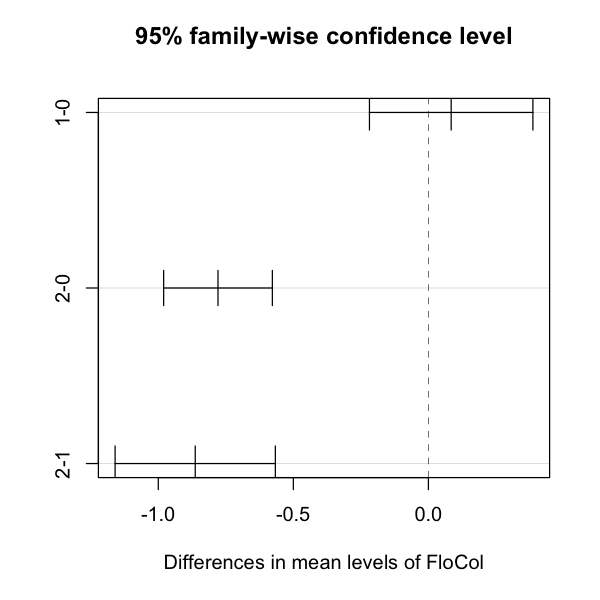

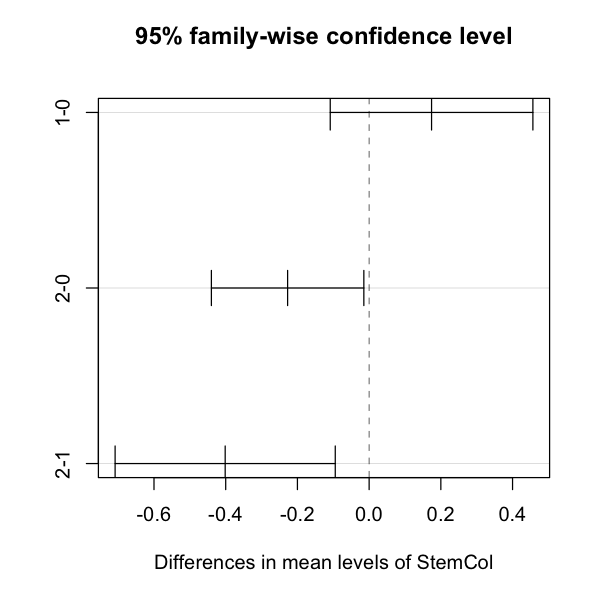

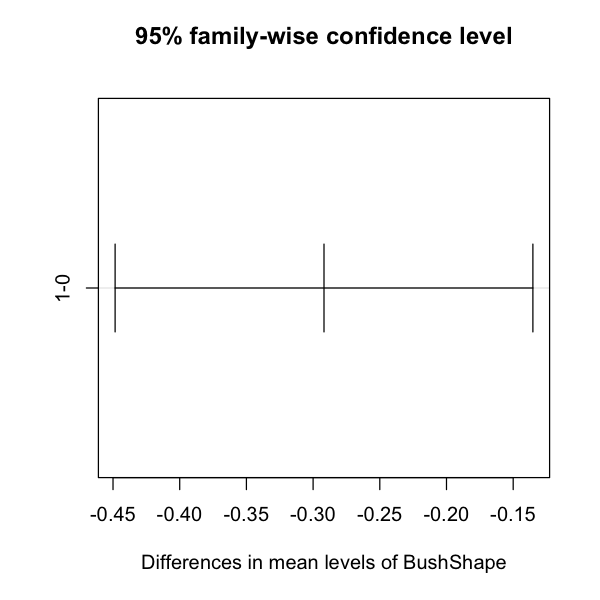

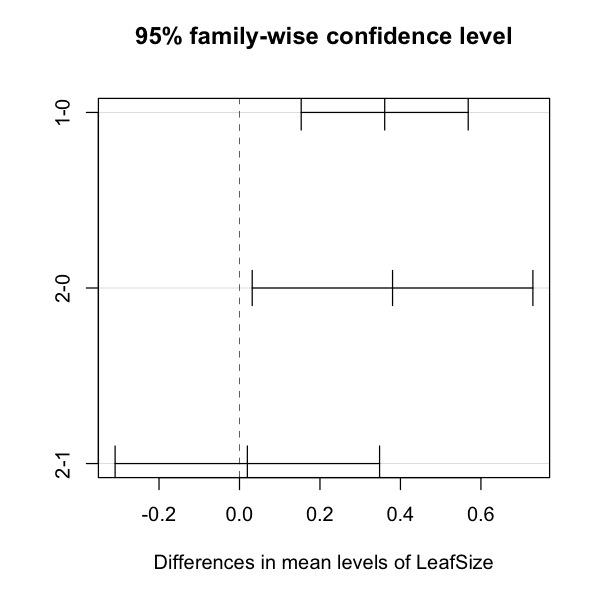

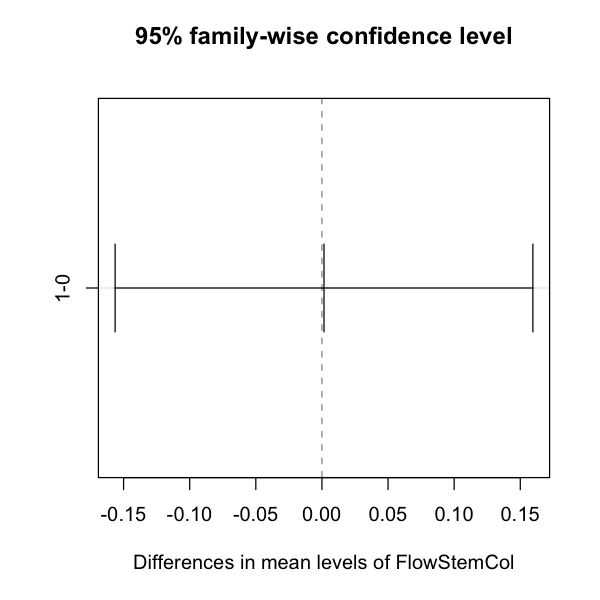

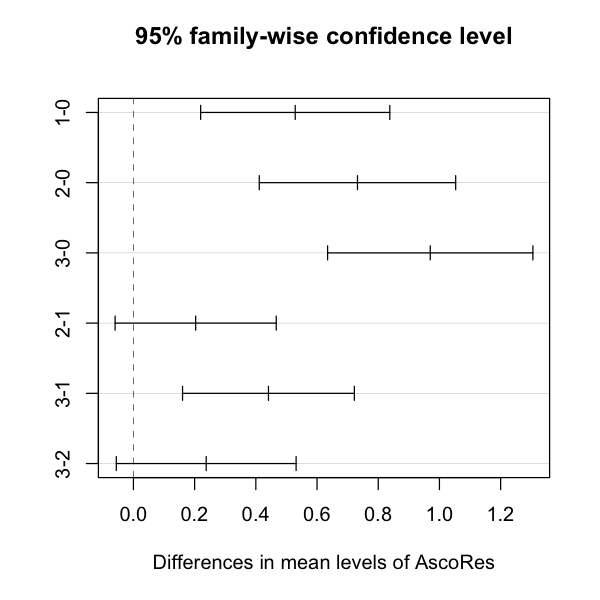

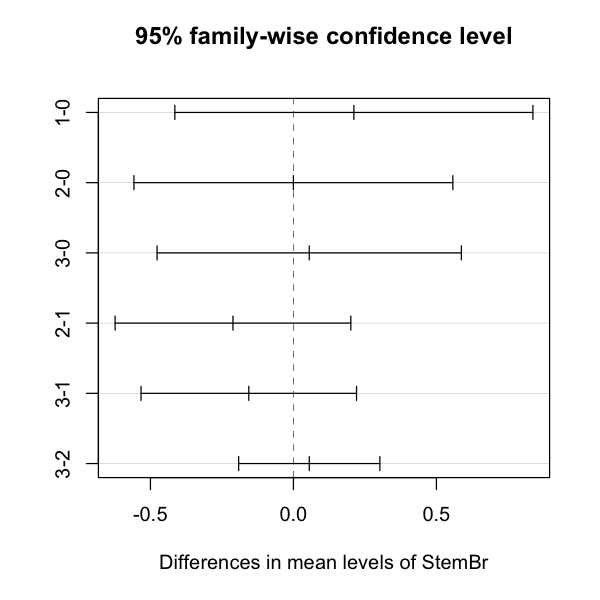

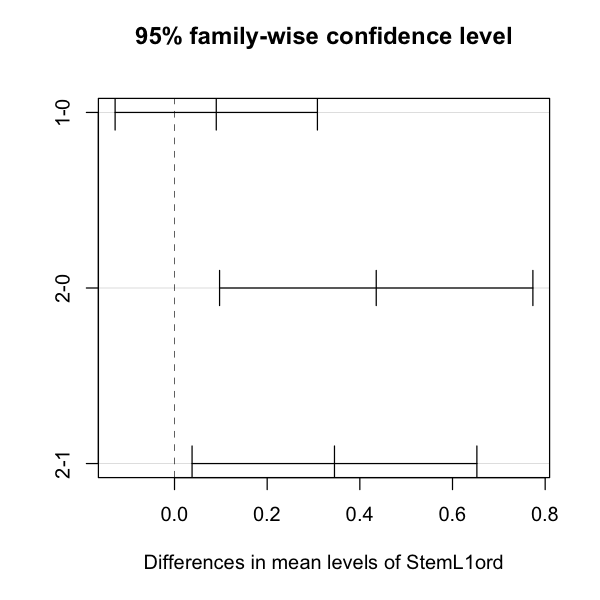

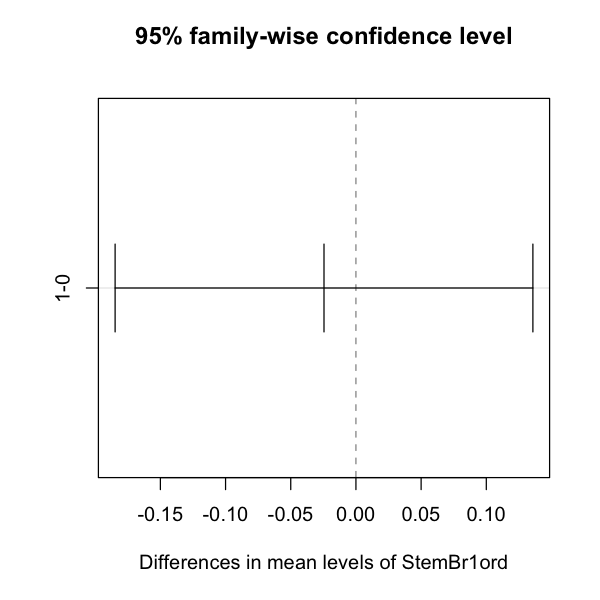

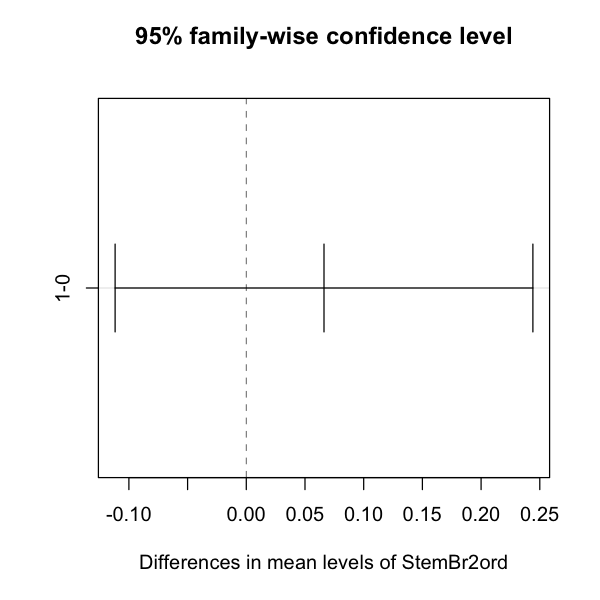

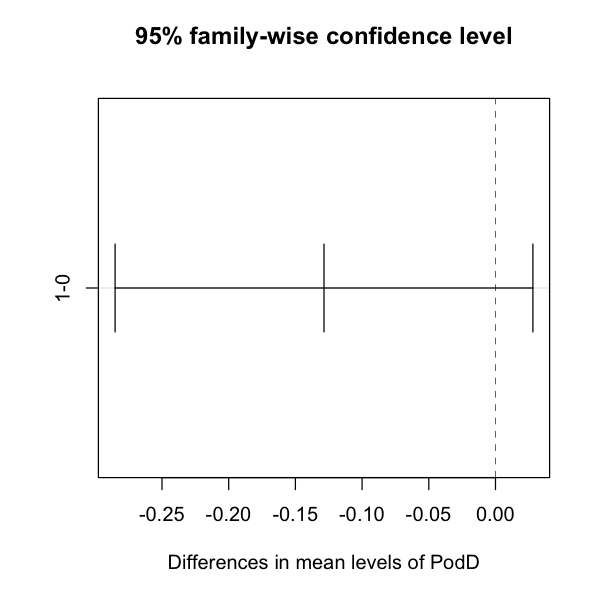

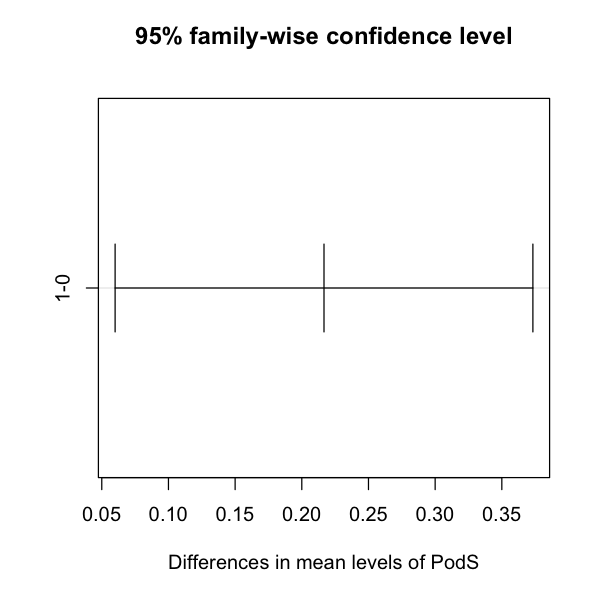

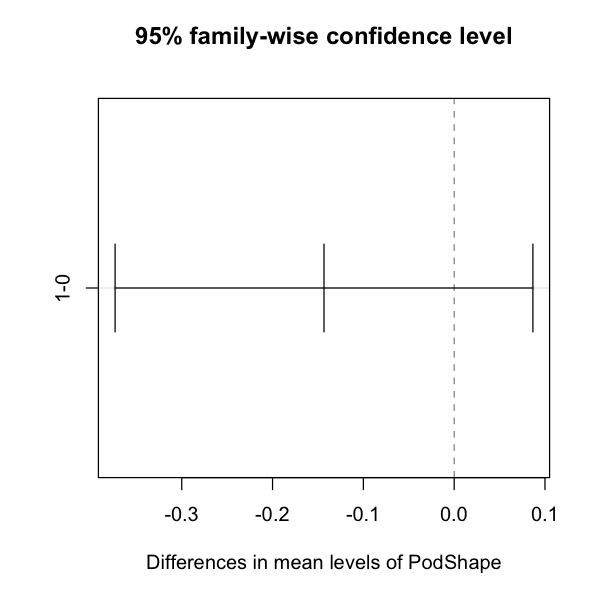

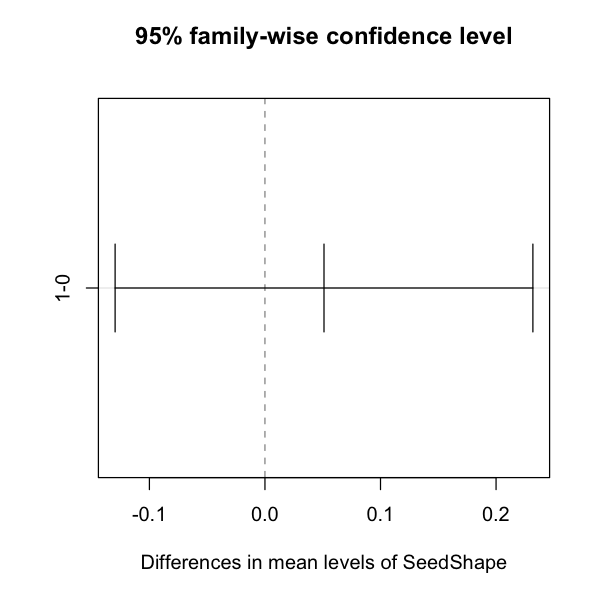

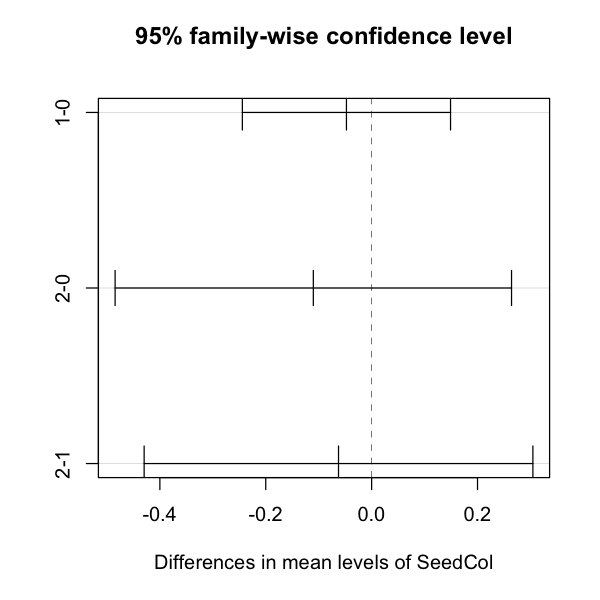

In [11]:
tuk <- TukeyHSD(fit_multifact)
plot(tuk)

#### We got these not detectably different groups: BushShape, AscoRes, PodS, StemL1ord.
Some groups overlap with some levels. We conclude there is a significant difference in PodsWeight with different values of BushShape, AscoRes, PodS, StemL1ord

In [12]:
fit_multifact_sign <- aov(PodsWeight ~ BushShape + AscoRes + PodS + StemL1ord, data=df_categorial)
summary(fit_multifact_sign)

             Df Sum Sq Mean Sq F value   Pr(>F)    
BushShape     1  20.03  20.035   26.71 3.76e-07 ***
AscoRes       3  58.28  19.428   25.90 2.56e-15 ***
PodS          1  14.95  14.953   19.93 1.05e-05 ***
StemL1ord     2  12.69   6.346    8.46 0.000252 ***
Residuals   396 297.04   0.750                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

### Linear regression

In [13]:
fit_multilin <- lm(PodsWeight ~ ., data=df_continuous)
summary(fit_multilin)


Call:
lm(formula = PodsWeight ~ ., data = df_continuous)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.01151 -0.17526  0.00598  0.21421  1.28417 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.457e-12  1.863e-02   0.000  1.00000    
Germ          4.229e-02  2.138e-02   1.978  0.04868 *  
GBegF         7.584e-05  2.178e-02   0.003  0.99722    
BegFEndF      4.628e-02  2.947e-02   1.570  0.11719    
EndFBegM     -5.421e-02  3.102e-02  -1.748  0.08133 .  
BegMEndM      3.104e-02  1.971e-02   1.575  0.11615    
Height        3.381e-02  3.258e-02   1.038  0.30002    
Hlp          -5.024e-02  2.475e-02  -2.030  0.04302 *  
NoPodsWeight  1.252e-01  3.835e-02   3.265  0.00119 ** 
PodsNumber    3.955e-01  5.045e-02   7.841 4.33e-14 ***
SeedsNumber  -1.099e-02  6.549e-02  -0.168  0.86678    
SeedsWeight   3.956e-01  6.932e-02   5.708 2.27e-08 ***
PodLength     1.004e-01  3.351e-02   2.996  0.00291 ** 
PodWidth      4.738e-02  3.432e-02   1.

**Adjusted R-squared** ~0.86 => 86% of the variance of *the dependent* variable are explained by the  variance of *the independent* variable. \
**p-value** of the F-statistic is << 0.05 => the model `fit_multilin` is significant and hypothesis about the equality of all linear model coefficients to 0 is rejected

### Significant features model

NoPodsWeight, PodsNumber, SeedsWeight, PodLength

In [14]:
fit_multilin_sign <- lm(PodsWeight ~ NoPodsWeight + PodsNumber + 
                        SeedsWeight + PodLength, data=df_continuous)
summary(fit_multilin_sign)


Call:
lm(formula = PodsWeight ~ NoPodsWeight + PodsNumber + SeedsWeight + 
    PodLength, data = df_continuous)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09473 -0.19456  0.00609  0.21506  1.26779 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.613e-11  1.899e-02   0.000        1    
NoPodsWeight 1.934e-01  2.916e-02   6.633 1.07e-10 ***
PodsNumber   3.785e-01  3.997e-02   9.469  < 2e-16 ***
SeedsWeight  4.019e-01  4.400e-02   9.134  < 2e-16 ***
PodLength    1.625e-01  2.505e-02   6.486 2.62e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3817 on 399 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.8558,	Adjusted R-squared:  0.8543 
F-statistic: 591.9 on 4 and 399 DF,  p-value: < 2.2e-16


In [15]:
dim(df_continuous)[2] + 1

[1] 16

In [16]:
df_glm <- df_continuous
df_glm[, dim(df_continuous)[2] + 1] <- list(BushShape=df_categorial[, "BushShape"])
df_glm

Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,PodsNumber,SeedsNumber,SeedsWeight,PodLength,PodWidth,Seed1000W,BushShape
-2.1289902,-0.98081811,0.26918539,-0.15856727,-1.0883455,0.7900028,0.5494152,0.7037179,0.733772253,0.71593979,1.04941879,0.72847727,-0.7355614,-1.2360736,-0.9465373,0
-2.1289902,-0.64950497,0.26918539,-0.15856727,-1.7436236,0.6776419,-0.5445412,0.7527438,0.854760144,0.92993941,1.44420876,0.86000987,-0.3928084,-1.2360736,-0.2990235,0
-2.1289902,-0.64950497,0.26918539,-0.99092397,0.8774887,0.4529201,-0.5445412,0.3609298,0.438825533,0.05897002,0.62383241,0.42318964,-0.3928084,-0.6873112,-0.5237654,0
-2.1289902,0.67574760,-0.54644644,-0.40035749,-0.4330675,0.6776419,0.9869978,0.7633832,0.143202878,-0.04390338,0.31398567,0.29803905,0.2926974,-0.1385489,-0.1591038,0
-2.1289902,-1.31213125,0.44616690,-0.40035749,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.103215399,-0.48403174,-0.22138914,-0.31743260,-1.0783143,-0.6873112,-0.8564317,0
-2.1289902,-0.98081811,0.61451166,-0.99092397,1.5327668,0.1158374,-0.5445412,-0.2002730,0.781665223,0.80473838,1.03464614,0.37259533,-1.4210672,-0.6873112,-1.3410172,0
-2.1289902,-0.64950497,0.44616690,-0.99092397,1.5327668,0.2281983,-0.5445412,0.1465487,0.038543193,0.12430582,0.73828237,0.30897318,-0.7355614,-1.2360736,-1.1364654,0
-2.1289902,-1.64344439,0.77502353,-0.67447664,1.2051278,-0.1088844,-0.5445412,-0.2706904,-0.350386052,-0.23023283,0.45518100,-0.10123622,-0.7355614,-1.2360736,-1.1364654,0
-2.1289902,0.67574760,-0.54644644,-0.67447664,1.2051278,2.1383336,1.6433716,0.5120401,-0.231167829,-0.89326633,-0.08364314,-0.33576599,1.3209562,0.4102134,-0.4467205,0
0.1167331,-0.64950497,0.08263277,-0.15856727,-1.0883455,-0.3336062,-1.2009150,-0.6158670,0.915471995,0.47170552,1.48795725,1.05189420,-0.3928084,-0.6873112,-0.6031104,0


In [17]:
fit_multilin_sign_g <- glm(BushShape ~ ., data=df_glm,
                        family="binomial")
summary(fit_multilin_sign_g)


Call:
glm(formula = BushShape ~ ., family = "binomial", data = df_glm)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.990  -1.060  -0.473   1.028   1.926  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.068472   0.107951  -0.634   0.5259   
Germ         -0.132959   0.127582  -1.042   0.2973   
GBegF         0.227289   0.131291   1.731   0.0834 . 
BegFEndF     -0.352944   0.172651  -2.044   0.0409 * 
EndFBegM      0.344939   0.186857   1.846   0.0649 . 
BegMEndM     -0.061444   0.115318  -0.533   0.5942   
Height        0.314093   0.191298   1.642   0.1006   
Hlp           0.275944   0.145614   1.895   0.0581 . 
NoPodsWeight -0.600620   0.230281  -2.608   0.0091 **
PodsWeight   -0.712397   0.305358  -2.333   0.0196 * 
PodsNumber    0.773413   0.323938   2.388   0.0170 * 
SeedsNumber   0.393158   0.389566   1.009   0.3129   
SeedsWeight  -0.556212   0.431433  -1.289   0.1973   
PodLength     0.217564   0.192437   1.131   0.2582   

In [18]:
install.packages("ROCR")

also installing the dependencies ‘bitops’, ‘gtools’, ‘gdata’, ‘caTools’, ‘gplots’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [19]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [21]:
df_glm[,-16]

Germ,GBegF,BegFEndF,EndFBegM,BegMEndM,Height,Hlp,NoPodsWeight,PodsWeight,PodsNumber,SeedsNumber,SeedsWeight,PodLength,PodWidth,Seed1000W
-2.1289902,-0.98081811,0.26918539,-0.15856727,-1.0883455,0.7900028,0.5494152,0.7037179,0.733772253,0.71593979,1.04941879,0.72847727,-0.7355614,-1.2360736,-0.9465373
-2.1289902,-0.64950497,0.26918539,-0.15856727,-1.7436236,0.6776419,-0.5445412,0.7527438,0.854760144,0.92993941,1.44420876,0.86000987,-0.3928084,-1.2360736,-0.2990235
-2.1289902,-0.64950497,0.26918539,-0.99092397,0.8774887,0.4529201,-0.5445412,0.3609298,0.438825533,0.05897002,0.62383241,0.42318964,-0.3928084,-0.6873112,-0.5237654
-2.1289902,0.67574760,-0.54644644,-0.40035749,-0.4330675,0.6776419,0.9869978,0.7633832,0.143202878,-0.04390338,0.31398567,0.29803905,0.2926974,-0.1385489,-0.1591038
-2.1289902,-1.31213125,0.44616690,-0.40035749,-1.0883455,-0.3336062,0.5494152,-0.8607554,-0.103215399,-0.48403174,-0.22138914,-0.31743260,-1.0783143,-0.6873112,-0.8564317
-2.1289902,-0.98081811,0.61451166,-0.99092397,1.5327668,0.1158374,-0.5445412,-0.2002730,0.781665223,0.80473838,1.03464614,0.37259533,-1.4210672,-0.6873112,-1.3410172
-2.1289902,-0.64950497,0.44616690,-0.99092397,1.5327668,0.2281983,-0.5445412,0.1465487,0.038543193,0.12430582,0.73828237,0.30897318,-0.7355614,-1.2360736,-1.1364654
-2.1289902,-1.64344439,0.77502353,-0.67447664,1.2051278,-0.1088844,-0.5445412,-0.2706904,-0.350386052,-0.23023283,0.45518100,-0.10123622,-0.7355614,-1.2360736,-1.1364654
-2.1289902,0.67574760,-0.54644644,-0.67447664,1.2051278,2.1383336,1.6433716,0.5120401,-0.231167829,-0.89326633,-0.08364314,-0.33576599,1.3209562,0.4102134,-0.4467205
0.1167331,-0.64950497,0.08263277,-0.15856727,-1.0883455,-0.3336062,-1.2009150,-0.6158670,0.915471995,0.47170552,1.48795725,1.05189420,-0.3928084,-0.6873112,-0.6031104


In [22]:
predictions <- predict(fit_multilin_sign_g, newdata=df_glm[,-16])
predictions

1             2             3             4             5 
-0.2690603588 -0.2652476004 -1.0095882081  0.3563540772 -0.2226010330 
            6             7             8             9            10 
-0.7412152985 -0.7049045959 -0.6531431949  0.9758427269 -0.7085333854 
           11            12            13            14            15 
-0.6712478226 -1.1142921672 -1.2682759402  0.3432807201 -0.4800147769 
           16            17            18            19            20 
 0.1011275988  0.7782903710 -0.5499273893 -0.1826955359  1.1114679994 
           21            22            23            24            25 
 0.0272332305  0.1871572640  0.9155458650  0.8118632010  0.5458492585 
           26            27            28            29            30 
 0.8892648336  2.0654364189  2.3591436963  1.2381493102  0.1306244208 
           31            32            33            34            35 
 0.1999074567  0.1899237282  1.8308494393  1.4029021238  0.1732224640 
           36            37            38            39            40 
 0.3930598835  1.3869640255 -0.0600073445  0.7096472604  0.6453201485 
           41            42            43            44            45 
 0.3533435982  0.2799415957 -0.2388150988  1.1885902062  0.7599728491 
           46            47            48            49            50 
 0.8719954683  0.9429600327  0.2329594920  0.5282049617 -0.2144255202 
           51            52            53            54            55 
 0.1028567228  1.0087180101  0.7443466185 -0.5533109008  1.2377629144 
           56            57            58            59            60 
 0.3065455827  0.2526125540 -0.0009017211 -0.4664414303 -0.9431608858 
           61            62            63            64            65 
-0.6387944803 -0.8081379838 -0.9104245265 -1.6855053748  0.6126181996 
           66            67            68            69            70 
 1.1573055125  1.0219594529  0.6567016544  0.5698433737  0.5269525797 
           71            72            73            74            75 
 0.2331141486 -0.2302063433  0.5825722685 -0.0709050969  1.1444255961 
           76            77            78            79            80 
 1.4939264117  0.8304954018  0.3538598225  0.4626865257 -2.1198800773 
           81            82            83            84            85 
-0.7973411724  0.0393391582  0.0047617518  0.8069337177 -0.7159327130 
           86            87            88            89            90 
-1.2620267961 -0.6462205981  0.3700657132  0.9440758983 -0.0015272942 
           91            92            93            94            95 
 0.3666805478  0.9253154351  0.6518400852  0.5832178054  0.3950950540 
           96            97            98            99           100 
 0.5857493660  0.8272552189  0.8413943114  0.5659054040  1.5107478843 
          101           102           103           104           105 
-0.4462304892  0.4268705049  0.9425782794 -0.3992847363 -1.4248296933 
          106           107           108           109           110 
-0.2857319644  1.1988875839  0.9745721005  0.5224333892  0.6472041428 
          111           112           113           114           115 
-0.1659577540  0.9861124830  0.5575192367  0.4346063748  0.8997684638 
          116           117           118           119           120 
 1.5366086725  0.8269998177  0.1947595837 -0.1712500348  0.8414287203 
          121           122           123           124           125 
-1.1141895799 -0.5023373592  0.9300430559 -1.0469431881 -0.4141001263 
          126           127           128           129           130 
-0.2374084152 -1.0677027745  0.4677428843 -1.6503007690  0.0185269599 
          131           132           133           134           135 
-0.3275972885  0.2719315103  1.0212818451  0.4205998215 -0.4861812587 
          136           137           138           139           140 
 1.3729590725 -1.2451510881 -0.5293174404 -0.0206897431  0.5108317117 
          141           142         

In [23]:
pred <- prediction(predictions, df_glm$BushShape)
perf <- performance(pred, "tpr", "fpr")

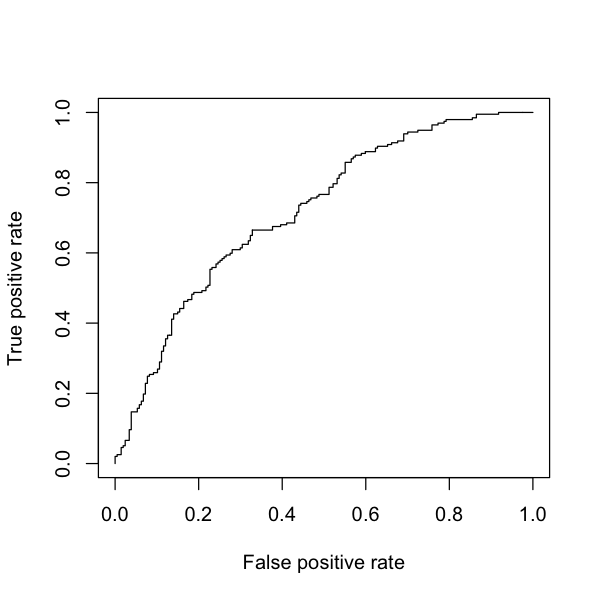

In [24]:
plot(perf)

In [27]:
 install.packages('rgl')

Warning message in install.packages("rgl"):
“installation of package ‘rgl’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [25]:
install.packages("pca3d")

also installing the dependencies ‘miniUI’, ‘webshot’, ‘crosstalk’, ‘manipulateWidget’, ‘rgl’, ‘ellipse’

Warning message in install.packages("pca3d"):
“installation of package ‘rgl’ had non-zero exit status”Warning message in install.packages("pca3d"):
“installation of package ‘pca3d’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(pca3d)

In [5]:
pca <- prcomp(df)

ERROR: Error in svd(x, nu = 0, nv = k): infinite or missing values in 'x'
